In [26]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mt
import warnings

In [2]:
data = pd.read_csv(r"../Python ile Makine Öğrenmesi/winequality-red.csv")
data2 = data.copy()
print(data2.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [3]:
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
y = data2["quality"]
X = data2.drop(columns="quality",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [6]:
standartScaled = StandardScaler()
X_train = standartScaled.fit_transform(X_train)
X_test = standartScaled.transform(X_test)

In [22]:
pca = PCA()
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)

In [23]:
# şimdiye kadar yaptıklarımız ile devam edecek olursak PCA() fonksiyonuna
# Bizim onu kaç değişkenli yani kaç boyuta indirgeyeceğimizi vermemiz lazım 
# Özünde bir optimizasyon problemi olan bu konuya. Bir cross-validation ile 
# en uygun parametreyi bulabiliriz aslında. 
# Bunu görmek için 2 ayrı linear modelin farklı boyutlardaki çıktılarına bakalım
# 3 değişkenli hali ile 6 değişkenli halini karşılaştıralım. 
pca2 = PCA(n_components=3)
X_train4 = pca.fit_transform(X_train)
X_test4 = pca.transform(X_test)

pca3 = PCA(n_components=6) # normal halini bir önceki hücrede bıraktık
X_train3 = pca3.fit_transform(X_train)
X_test3 = pca3.transform(X_test)

lr1 = LinearRegression().fit(X_train4,y_train)
y_pred4 = lr1.predict(X_test4)
print(mt.r2_score(y_test,y_pred4),np.sqrt(mt.mean_squared_error(y_test,y_pred4)))

lr2 = LinearRegression().fit(X_train3,y_train)
y_pred3 = lr2.predict(X_test3)
print(mt.r2_score(y_test,y_pred3),np.sqrt(mt.mean_squared_error(y_test,y_pred3)))
# sonuçta görüldüğü gibi R2 skoru artarken hatamız azalıyor. Şimdi cross-val ile 
# hem skorumuzu görelim hem de uygun değerlerimizi ve eğitim kümemizi halledelim


0.3869039632632535 0.6052280007453976
0.35609237902950586 0.6202496681888884


C:\Users\Kemalettin\AppData\Local\Temp\ipykernel_8348\2258446782.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  resid = np.sqrt(-1*cross_val_score(lm1,X_train2[:,:i],y_train.ravel(),cv=cv,
C:\Users\Kemalettin\AppData\Local\Temp\ipykernel_8348\2258446782.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  resid = np.sqrt(-1*cross_val_score(lm1,X_train2[:,:i],y_train.ravel(),cv=cv,
C:\Users\Kemalettin\AppData\Local\Temp\ipykernel_8348\2258446782.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  resid = np.sqrt(-1*cross_val_score(lm1,X_train2[:,:i],y_train.ravel(),cv=cv,
C:\Users\Kemalettin\AppData\Local\Temp\ipykernel_8348\2

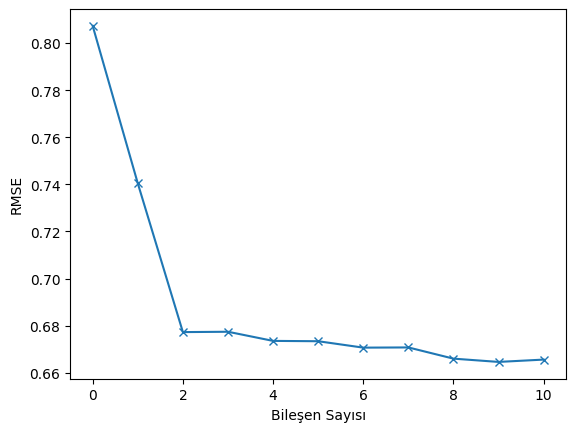

In [37]:

RMSE = [] # Kfold ortalma hata alıyordu değerleri görmek ve tutmak için liste oluşturalım
cv = KFold(n_splits=10,shuffle=True,random_state=3)
lm1 = LinearRegression()

for i in range(1,X_train2.shape[1]+1):
    resid = np.sqrt(-1*cross_val_score(lm1,X_train2[:,:i],y_train.ravel(),cv=cv,
                                       scoring="neg_mean_squared_error").mean())
    RMSE.append(resid)
    
plt.plot(RMSE,"-x")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("RMSE")
plt.show()


Yukarıdaki grafikte görüldüğü gibi kırılımın olduğu değer 2 yani 2.değişkenden sonra ekleyeceğimiz her bir değişkeninin bizim tahminde oluşacak iyileşmeye çok da bir etkisi yok yani 10 değişken kullanmak ile 2 değişken kullanmak arasında gelen maliyet örnek olsun 10 ₺ iken getirisi 2 ₺ bize zarar veriyor diyebiliriz. Bu yüzden 2 kullanmak daha mantıklı olacaktır. 